# The Sparks Foundation- GRIP- Data Science and Business Analytics Intern- October-2021 batch

Author :- Dhaval Sunil Tharkar

Task 2 :- Prediction using Unsupervised Machine Learning model

Level :- Beginner

Language :- Python

Software :- Jupyter Notebook

DataSet can be downloaded from this link :- https://bit.ly/3kXTdox

Problem statement :- From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually

### Importing Required Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings; warnings.filterwarnings('ignore')
%matplotlib inline

## Reading the Dataset using read_csv()

Read the csv file of iris dataset and store it into the variable name called task2

In [2]:
task2 = pd.read_csv('iris.csv')
task2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Exploratory Data Analysis EDA on the dataset variable task2

In [3]:
task2.head() # Shows the first five rows of the data from variable task2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
task2.tail() # Shows the last five rows of the data from variable task2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
task2.rename(columns={'SepalLengthCm':'SepalLength', 'SepalWidthCm':'SepalWidth','PetalLengthCm':'PetalLength','PetalWidthCm':'PetalWidth'}, inplace=True)
# renaming the column name SepalLengthCm as SepalLength , SepalWidthCm as SepalWidth , PetalLengthCm as PetalLength , PetalWidthCm as PetalWidth

In [6]:
task2['Species'].replace({'Iris-virginica':'virginica','Iris-setosa':'setosa','Iris-versicolor':'versicolor'},inplace=True)
# replacing the Iris-virginica by  virginica into the Species Column
# replacing the Iris-setosa by setosa into the Species Column
# replacing the Iris-versicolor by  versicolor into the Species Column

In [7]:
task2=task2.drop("Id", axis=1)
# As the Id column in the iris dataset resembles to the serial number of the rows inserted as it is not necessary for prediction 
# we asre droping the Id column  from the data set

In [8]:
task2.shape # shows the shape of the data variable in tuple format
# variable_name(number of rows, number of columns)

(150, 5)

In [9]:
task2.info() # Print the summary of the dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
task2.describe() 
# shows the Statistical details like count, mean,standard deviation, minimum value, quartile 1 i.e. 25 %, quartile 2 i.e. median or 50 %, quartile 3 i.e. 75%, maximum value 

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
task2.isna().sum() # Checks whether the dataset contains any null value or not 
# isna().sum() will give the sum of the null values present in the dataset

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

### Data Visualization and Correlation Matrix

<AxesSubplot:>

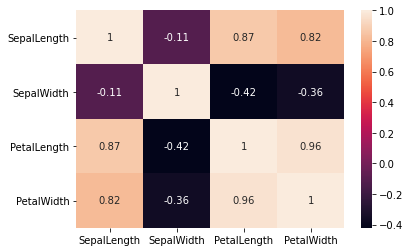

In [12]:
sns.heatmap(task2.corr(),annot=True)

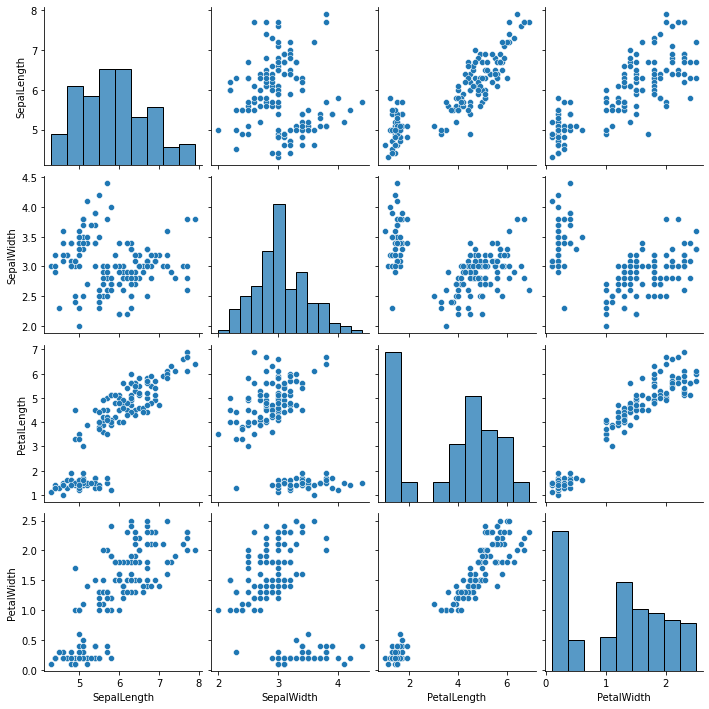

In [13]:
sns.pairplot(task2)

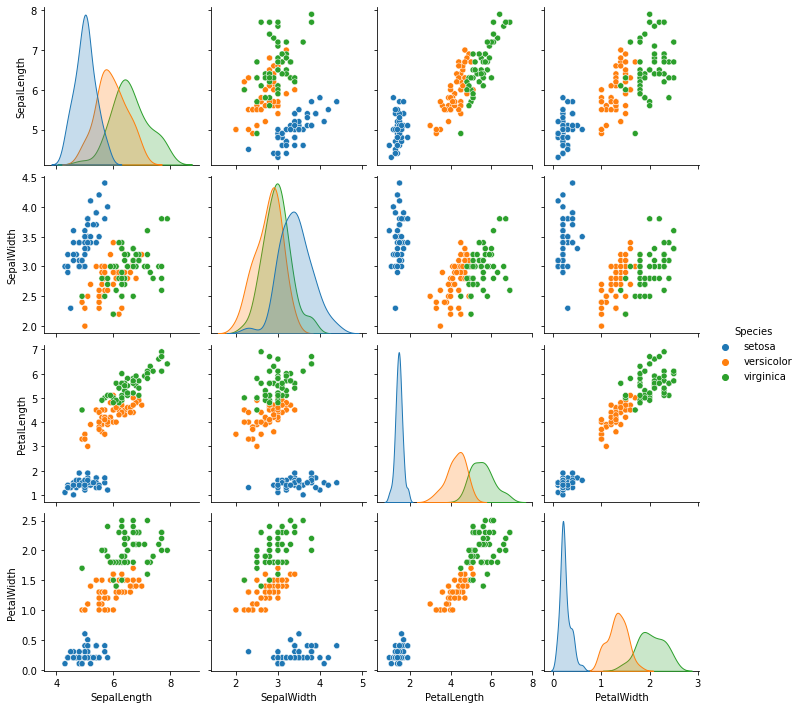

In [14]:
sns.pairplot(task2,hue='Species')
# blue color represents the setosa
# orange color represents the versicolor
# green color represeents the virginica

In [15]:
x = task2.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans 
# importing K-means library for un supervised ML Model

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

### Plotting The Elbow Graph To Find Optimal Value Of 'K'

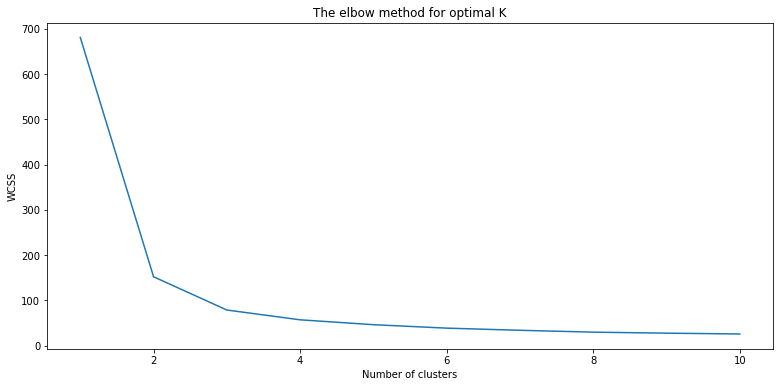

In [16]:
plt.figure(figsize=(13,6))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method for optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

the above graph is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. 

As we see there is a occurance of elbow on to the cluster 2 and slightly on cluster 3

As there is no changes occuring in graph from the cluster 5 to 10

### Applying K-Means cluster when number of clusters is 5

In [18]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
iris_k_model = KMeans(n_clusters=5)
iris_k_model.fit(x)

KMeans(n_clusters=5)

In [19]:
print(iris_k_model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 3 1 3 1 3 1 3 3 1 3 1 3 1 1 3 1 3 1 3 1 1
 1 1 1 1 1 3 3 3 3 1 3 1 1 1 3 3 3 1 3 3 3 3 3 1 3 3 2 1 4 2 2 4 3 4 2 4 2
 2 2 1 2 2 2 4 4 1 2 1 4 1 2 4 1 1 2 4 4 4 2 1 1 4 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [20]:
print(iris_k_model.cluster_centers_)

[[5.006      3.418      1.464      0.244     ]
 [6.22105263 2.85526316 4.75263158 1.57105263]
 [6.52916667 3.05833333 5.50833333 2.1625    ]
 [5.51538462 2.60769231 3.93076923 1.20769231]
 [7.475      3.125      6.3        2.05      ]]


Text(0.5, 1.0, 'K-Means Clustering using n_cluster=5')

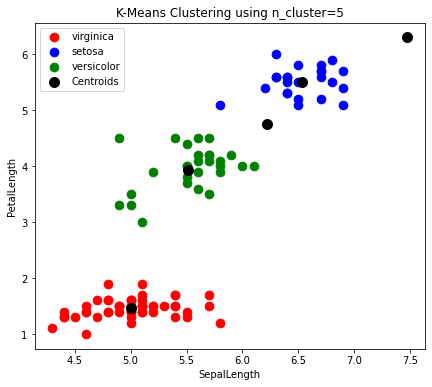

In [21]:
plt.figure(figsize=(7,6))
plt.scatter(task2.iloc[y_kmeans==0,0],task2.iloc[y_kmeans==0,2],s=75,c='red',label='virginica')
plt.scatter(task2.iloc[y_kmeans==1,0],task2.iloc[y_kmeans==1,2],s=75,c='blue',label='setosa')
plt.scatter(task2.iloc[y_kmeans==2,0],task2.iloc[y_kmeans==2,2],s=75,c='green',label='versicolor')
plt.scatter(iris_k_model.cluster_centers_[:,0],iris_k_model.cluster_centers_[:,2],s=100,c='black',label='Centroids')
plt.legend()
plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.title('K-Means Clustering using n_cluster=5')

### Applying K-Means cluster when number of clusters is 4

In [22]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
iris_k_model = KMeans(n_clusters=4)
iris_k_model.fit(x)

KMeans(n_clusters=4)

In [23]:
print(iris_k_model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 0 3 0 3 0 3 0 0 0 0 3 0 3 0 0 3 0 3 0 3 3
 3 3 3 3 3 0 0 0 0 3 0 3 3 3 0 0 0 3 0 0 0 0 0 3 0 0 2 3 2 2 2 2 0 2 2 2 3
 3 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 3 2 2 2 3 2 2 2 3 2 2 2 3 3
 2 3]


In [24]:
print(iris_k_model.cluster_centers_)

[[5.53214286 2.63571429 3.96071429 1.22857143]
 [5.006      3.418      1.464      0.244     ]
 [6.9125     3.1        5.846875   2.13125   ]
 [6.2525     2.855      4.815      1.625     ]]


Text(0.5, 1.0, 'K-Means Clustering using n_cluster=4')

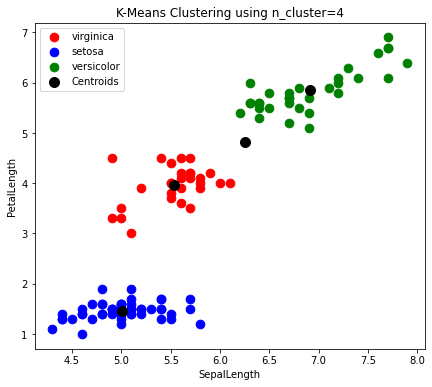

In [25]:
plt.figure(figsize=(7,6))
plt.scatter(task2.iloc[y_kmeans==0,0],task2.iloc[y_kmeans==0,2],s=75,c='red',label='virginica')
plt.scatter(task2.iloc[y_kmeans==1,0],task2.iloc[y_kmeans==1,2],s=75,c='blue',label='setosa')
plt.scatter(task2.iloc[y_kmeans==2,0],task2.iloc[y_kmeans==2,2],s=75,c='green',label='versicolor')
plt.scatter(iris_k_model.cluster_centers_[:,0],iris_k_model.cluster_centers_[:,2],s=100,c='black',label='Centroids')
plt.legend()
plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.title('K-Means Clustering using n_cluster=4')

### Applying K-Means cluster when number of clusters is 3

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
iris_k_model = KMeans(n_clusters=3)
iris_k_model.fit(x)

KMeans(n_clusters=3)

In [27]:
print(iris_k_model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [28]:
print(iris_k_model.cluster_centers_)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


Text(0.5, 1.0, 'K-Means Clustering using n_cluster=3')

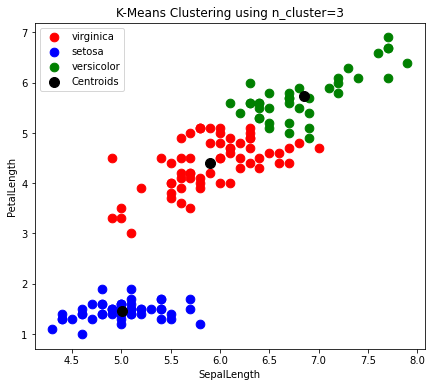

In [29]:
plt.figure(figsize=(7,6))
plt.scatter(task2.iloc[y_kmeans==0,0],task2.iloc[y_kmeans==0,2],s=75,c='red',label='virginica')
plt.scatter(task2.iloc[y_kmeans==1,0],task2.iloc[y_kmeans==1,2],s=75,c='blue',label='setosa')
plt.scatter(task2.iloc[y_kmeans==2,0],task2.iloc[y_kmeans==2,2],s=75,c='green',label='versicolor')
plt.scatter(iris_k_model.cluster_centers_[:,0],iris_k_model.cluster_centers_[:,2],s=100,c='black',label='Centroids')
plt.legend()
plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.title('K-Means Clustering using n_cluster=3')

## After seeing the all the three graph with cluster 5,4,3 we say that the cluster with 3 is a much better in cluster formation as compared to the n_cluster = 4 and 5  

# Thank You